**Question:**
*Temporal changes in serotype distribution*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [ ]:
data=files.upload()

Saving year_data.csv to year_data (1).csv


In [ ]:
df_year=pd.read_csv(io.StringIO(data['year_data.csv'].decode('utf-8')))

In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


Text(0.5, 1.0, 'Serotype distribution with respect to year')

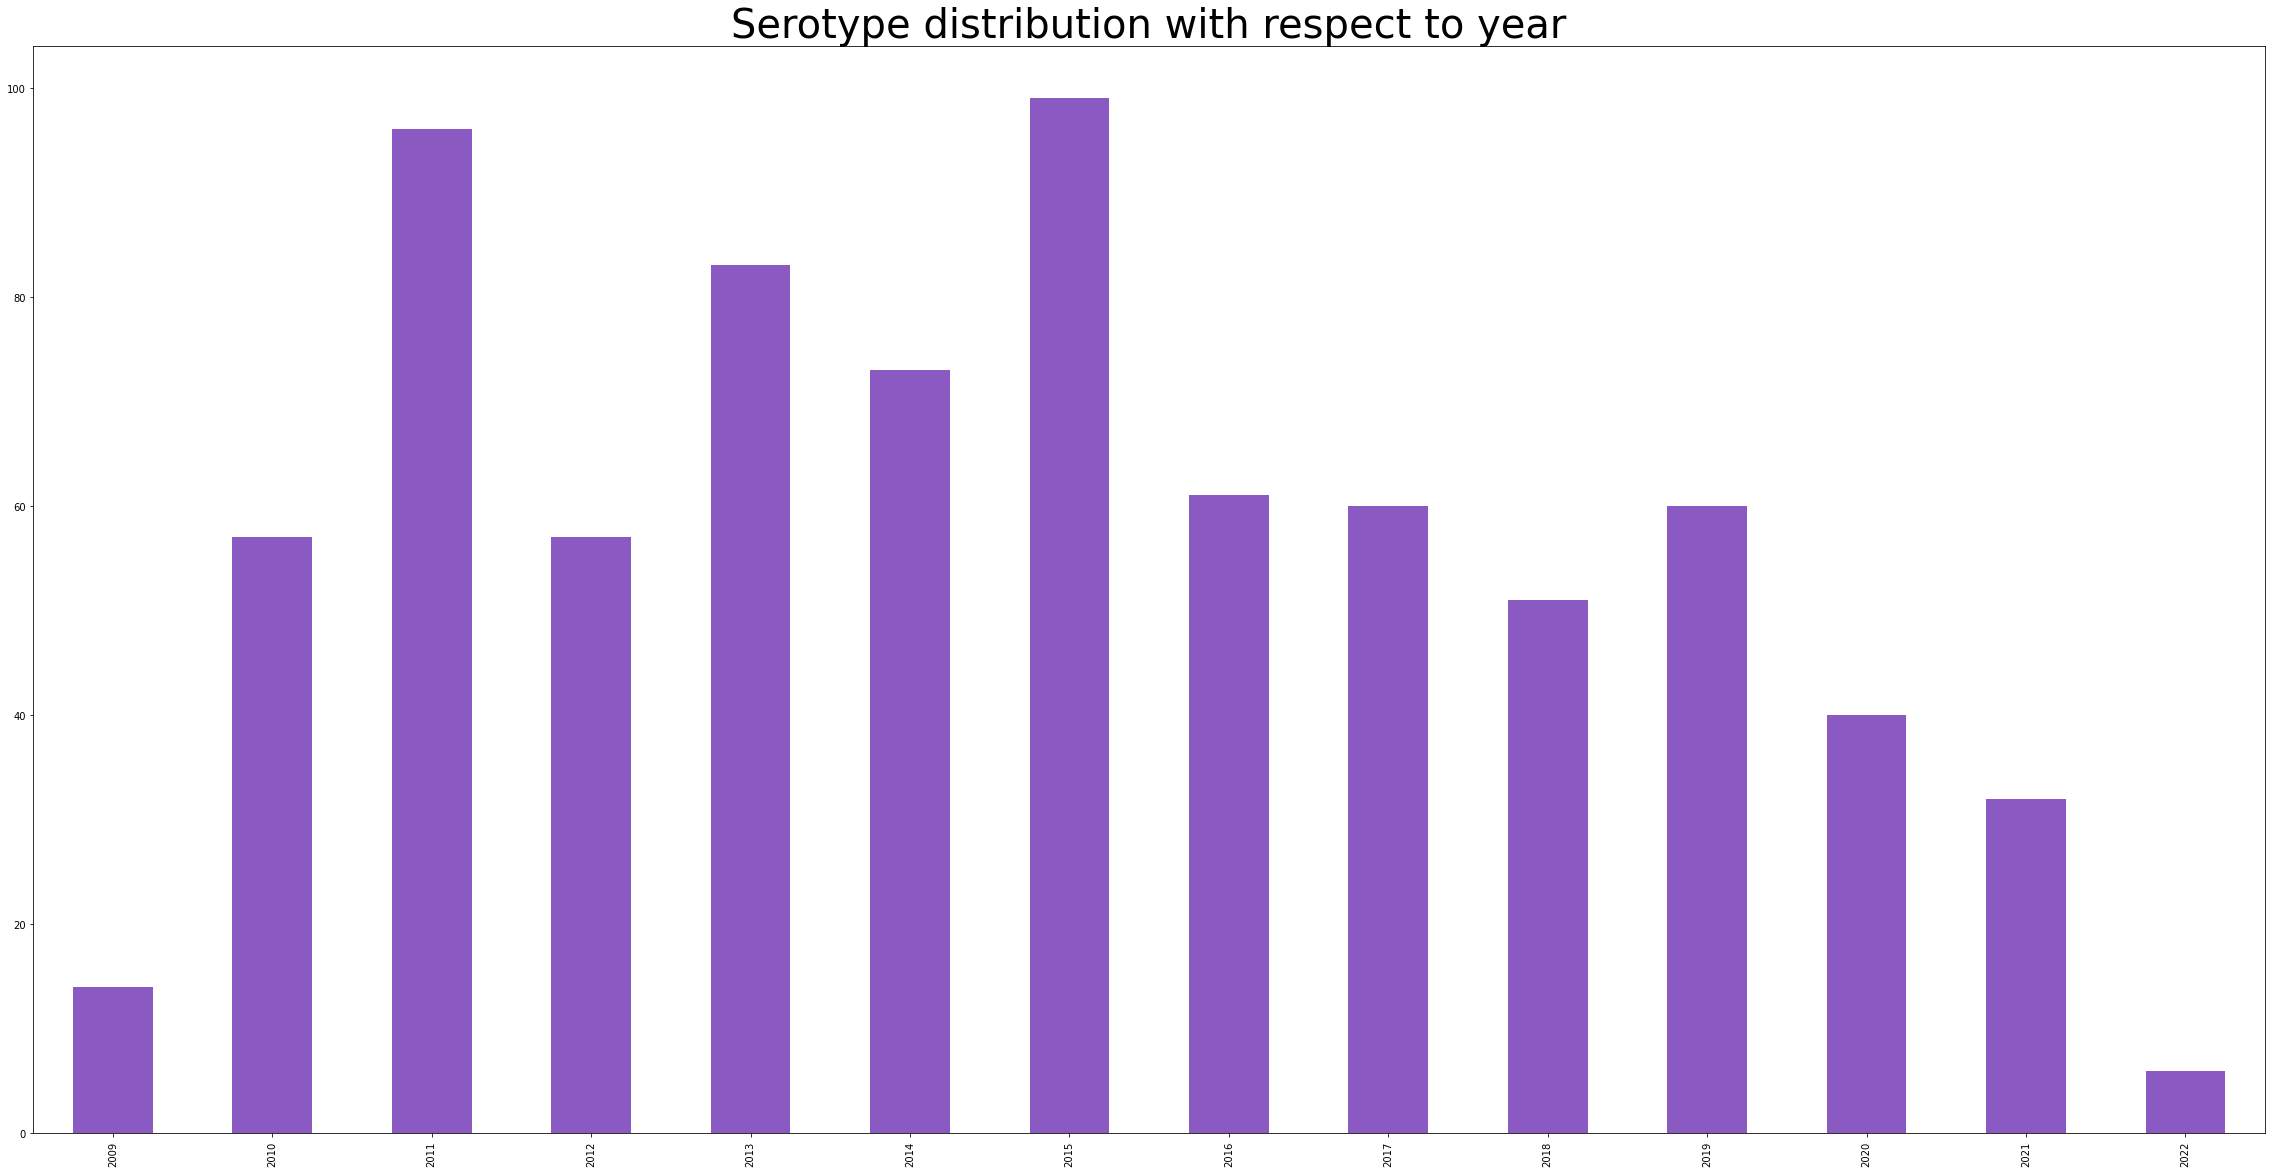

In [ ]:
plt.rcParams['figure.figsize'] = [40,20]
color1 = "#8A5AC2"
color2 = "#7C4D8B"
#003f5c #58508d #bc5090 #ff6361 "#ffa600"
num_points = 2000
df_year['year'].value_counts().sort_index().plot(kind='bar',color=get_color_gradient(color1,color2, num_points))
plt.title("Serotype distribution with respect to year",fontsize=40,
          color="black")

In [ ]:
data=files.upload()

Saving Sum_15_serotypes.csv to Sum_15_serotypes.csv


In [ ]:
df1=pd.read_csv(io.StringIO(data['Sum_15_serotypes.csv'].decode('utf-8')))

In [ ]:
data=files.upload()

Saving Sum_PCV_10.csv to Sum_PCV_10.csv


In [ ]:
df2=pd.read_csv(io.StringIO(data['Sum_PCV_10.csv'].decode('utf-8')))

In [ ]:
data=files.upload()

Saving Sum_top_5.csv to Sum_top_5.csv


In [ ]:
df3=pd.read_csv(io.StringIO(data['Sum_top_5.csv'].decode('utf-8')))

In [ ]:
df1

,year,Sum_15_serotypes
0,2009,5
1,2010,32
2,2011,32
3,2012,20
4,2013,31
5,2014,27
6,2015,44
7,2016,17
8,2017,29
9,2018,25


In [ ]:
df2

,year,Sum_PCV_10
0,2009,6
1,2010,8
2,2011,20
3,2012,14
4,2013,26
5,2014,20
6,2015,32
7,2016,15
8,2017,15
9,2018,13


In [ ]:
df3

,year,Sum_top_5
0,2009,5
1,2010,14
2,2011,27
3,2012,12
4,2013,15
5,2014,14
6,2015,24
7,2016,8
8,2017,23
9,2018,19


In [ ]:
df4=pd.concat([df1['year'],df1['Sum_15_serotypes'],df2['Sum_PCV_10'],df3['Sum_top_5']],axis=1)
df4

,year,Sum_15_serotypes,Sum_PCV_10,Sum_top_5
0,2009,5,6,5
1,2010,32,8,14
2,2011,32,20,27
3,2012,20,14,12
4,2013,31,26,15
5,2014,27,20,14
6,2015,44,32,24
7,2016,17,15,8
8,2017,29,15,23
9,2018,25,13,19


In [ ]:
plt.rcParams['figure.figsize'] = [40,20]

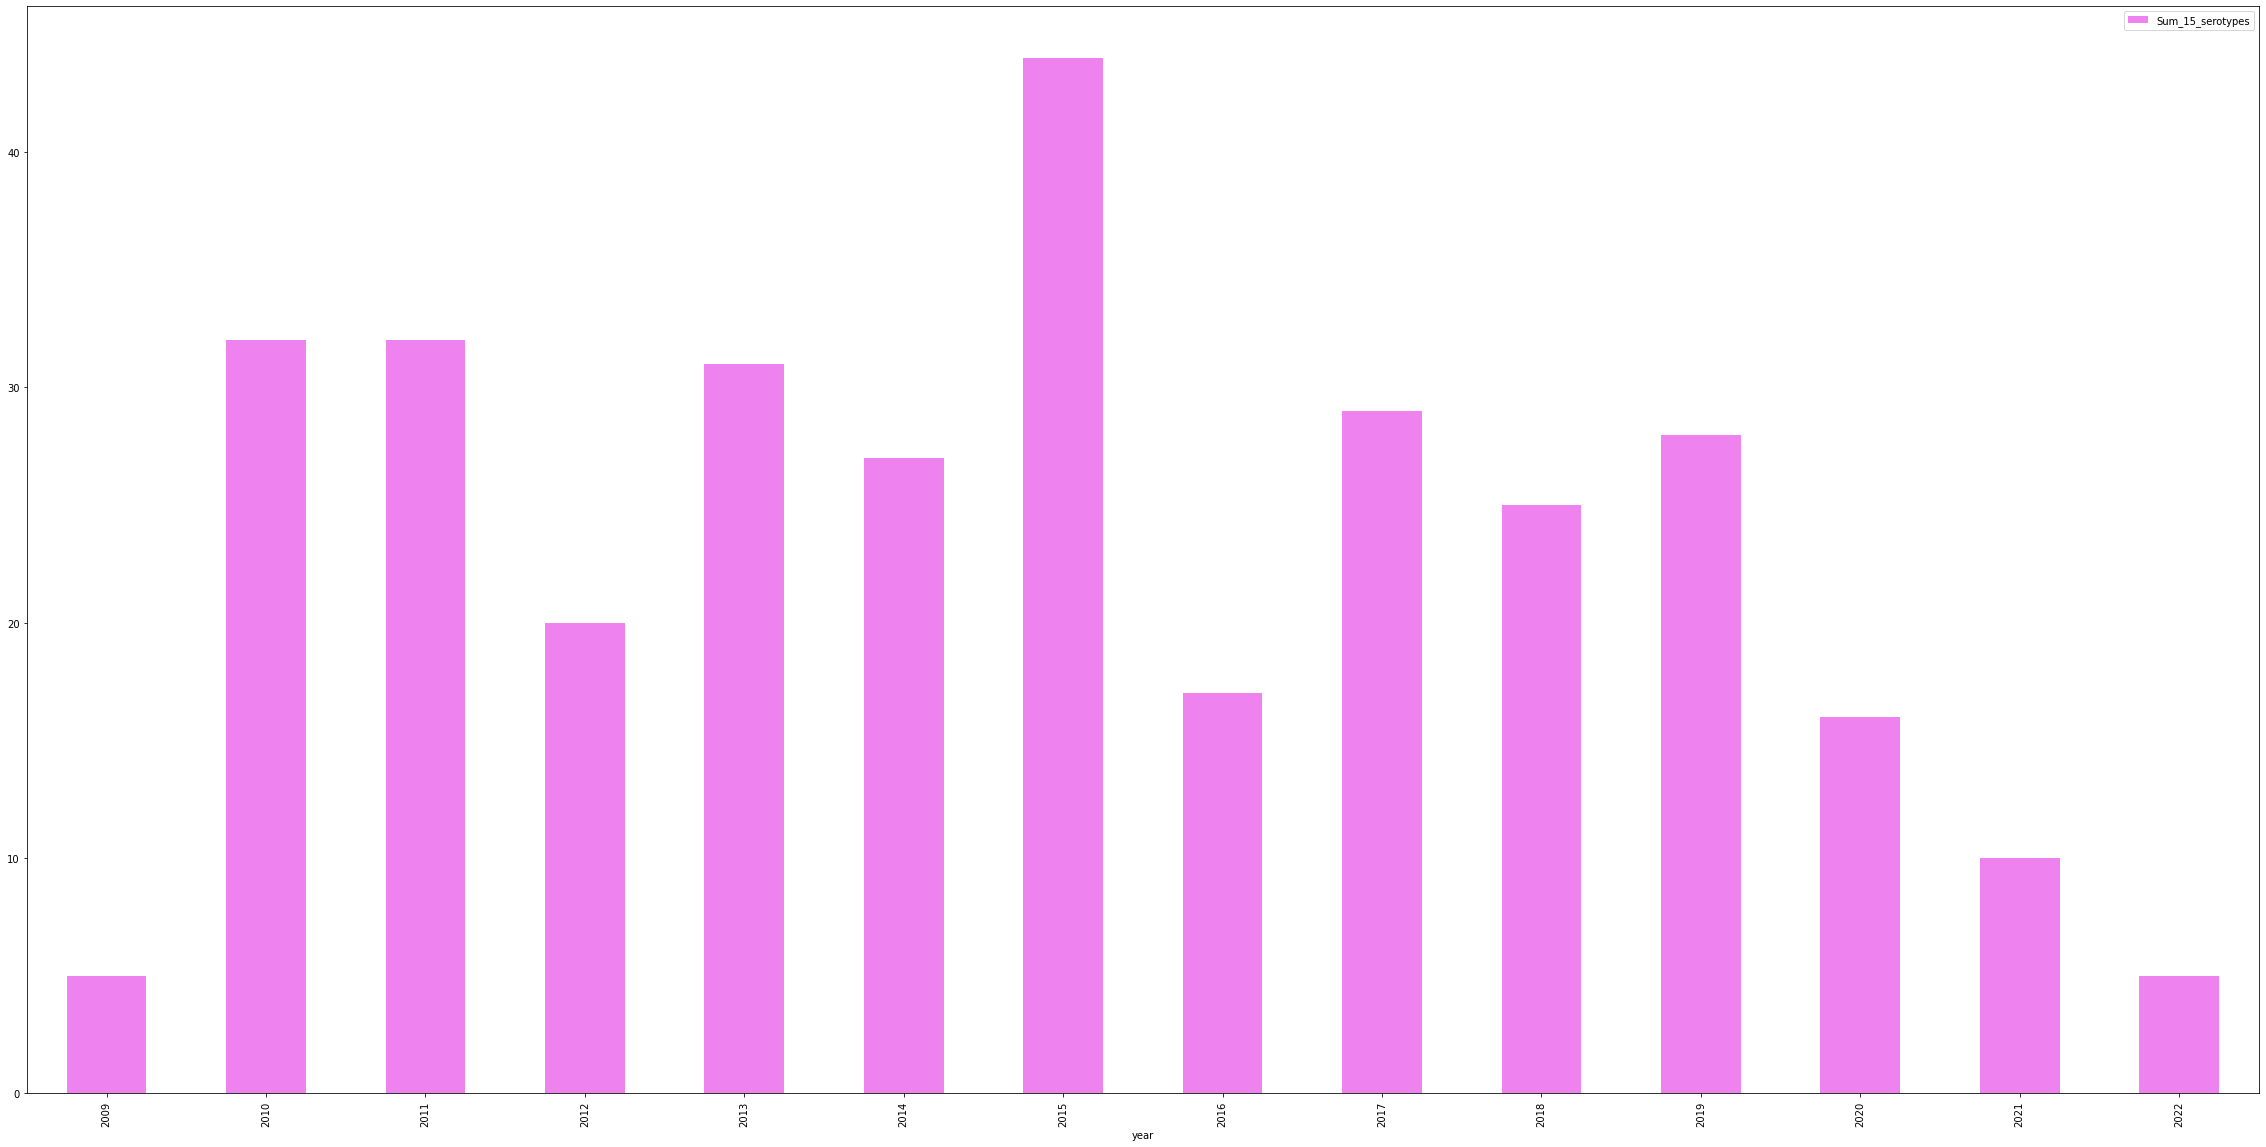

In [ ]:
df4.plot.bar(x='year',y='Sum_15_serotypes', color='violet')

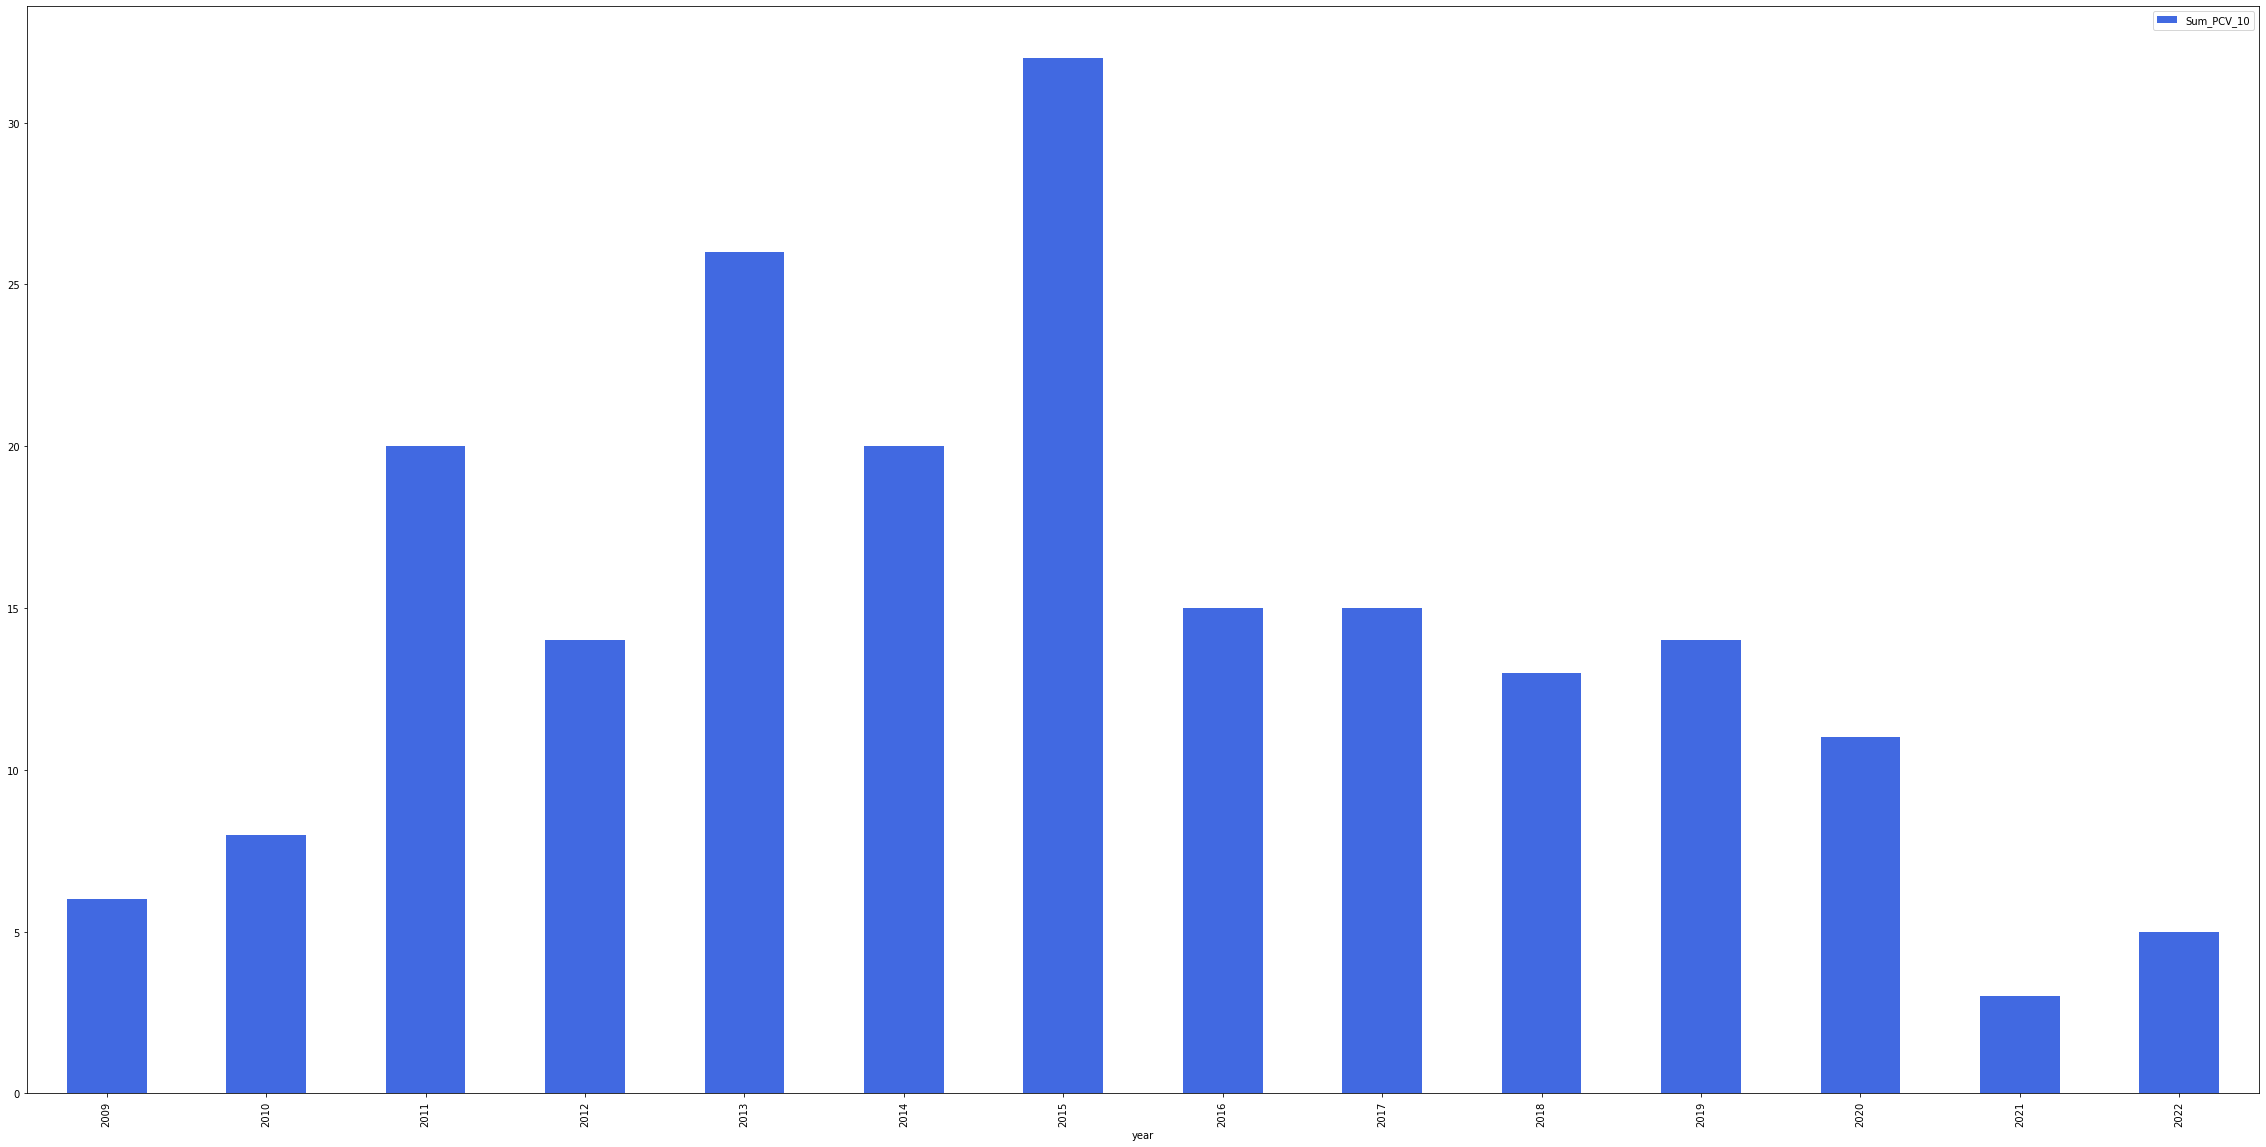

In [ ]:
df4.plot.bar(x='year',y='Sum_PCV_10', color='royalblue')

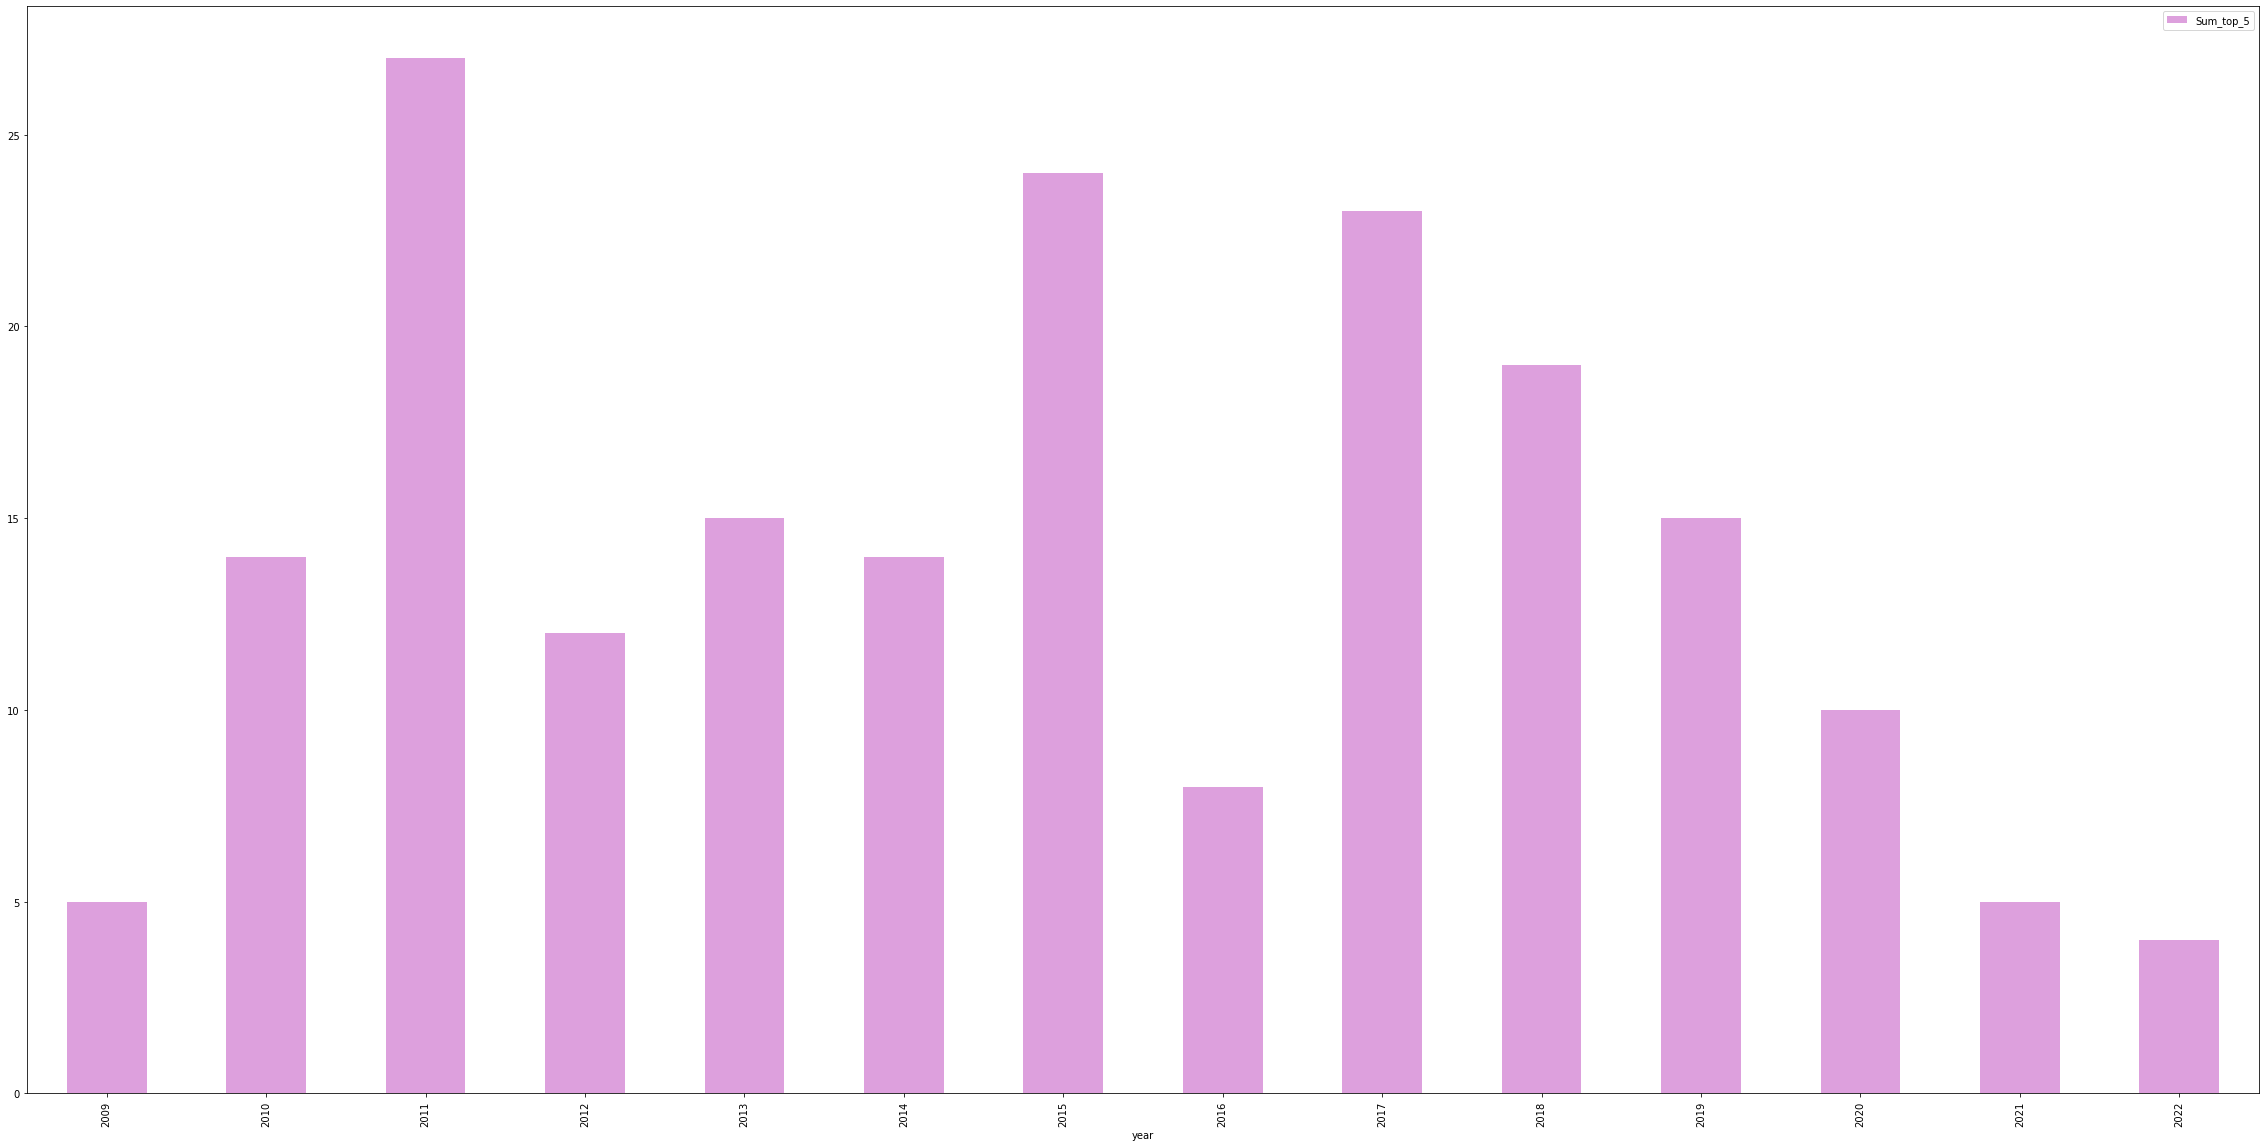

In [ ]:
df4.plot.bar(x='year',y='Sum_top_5', color='plum')

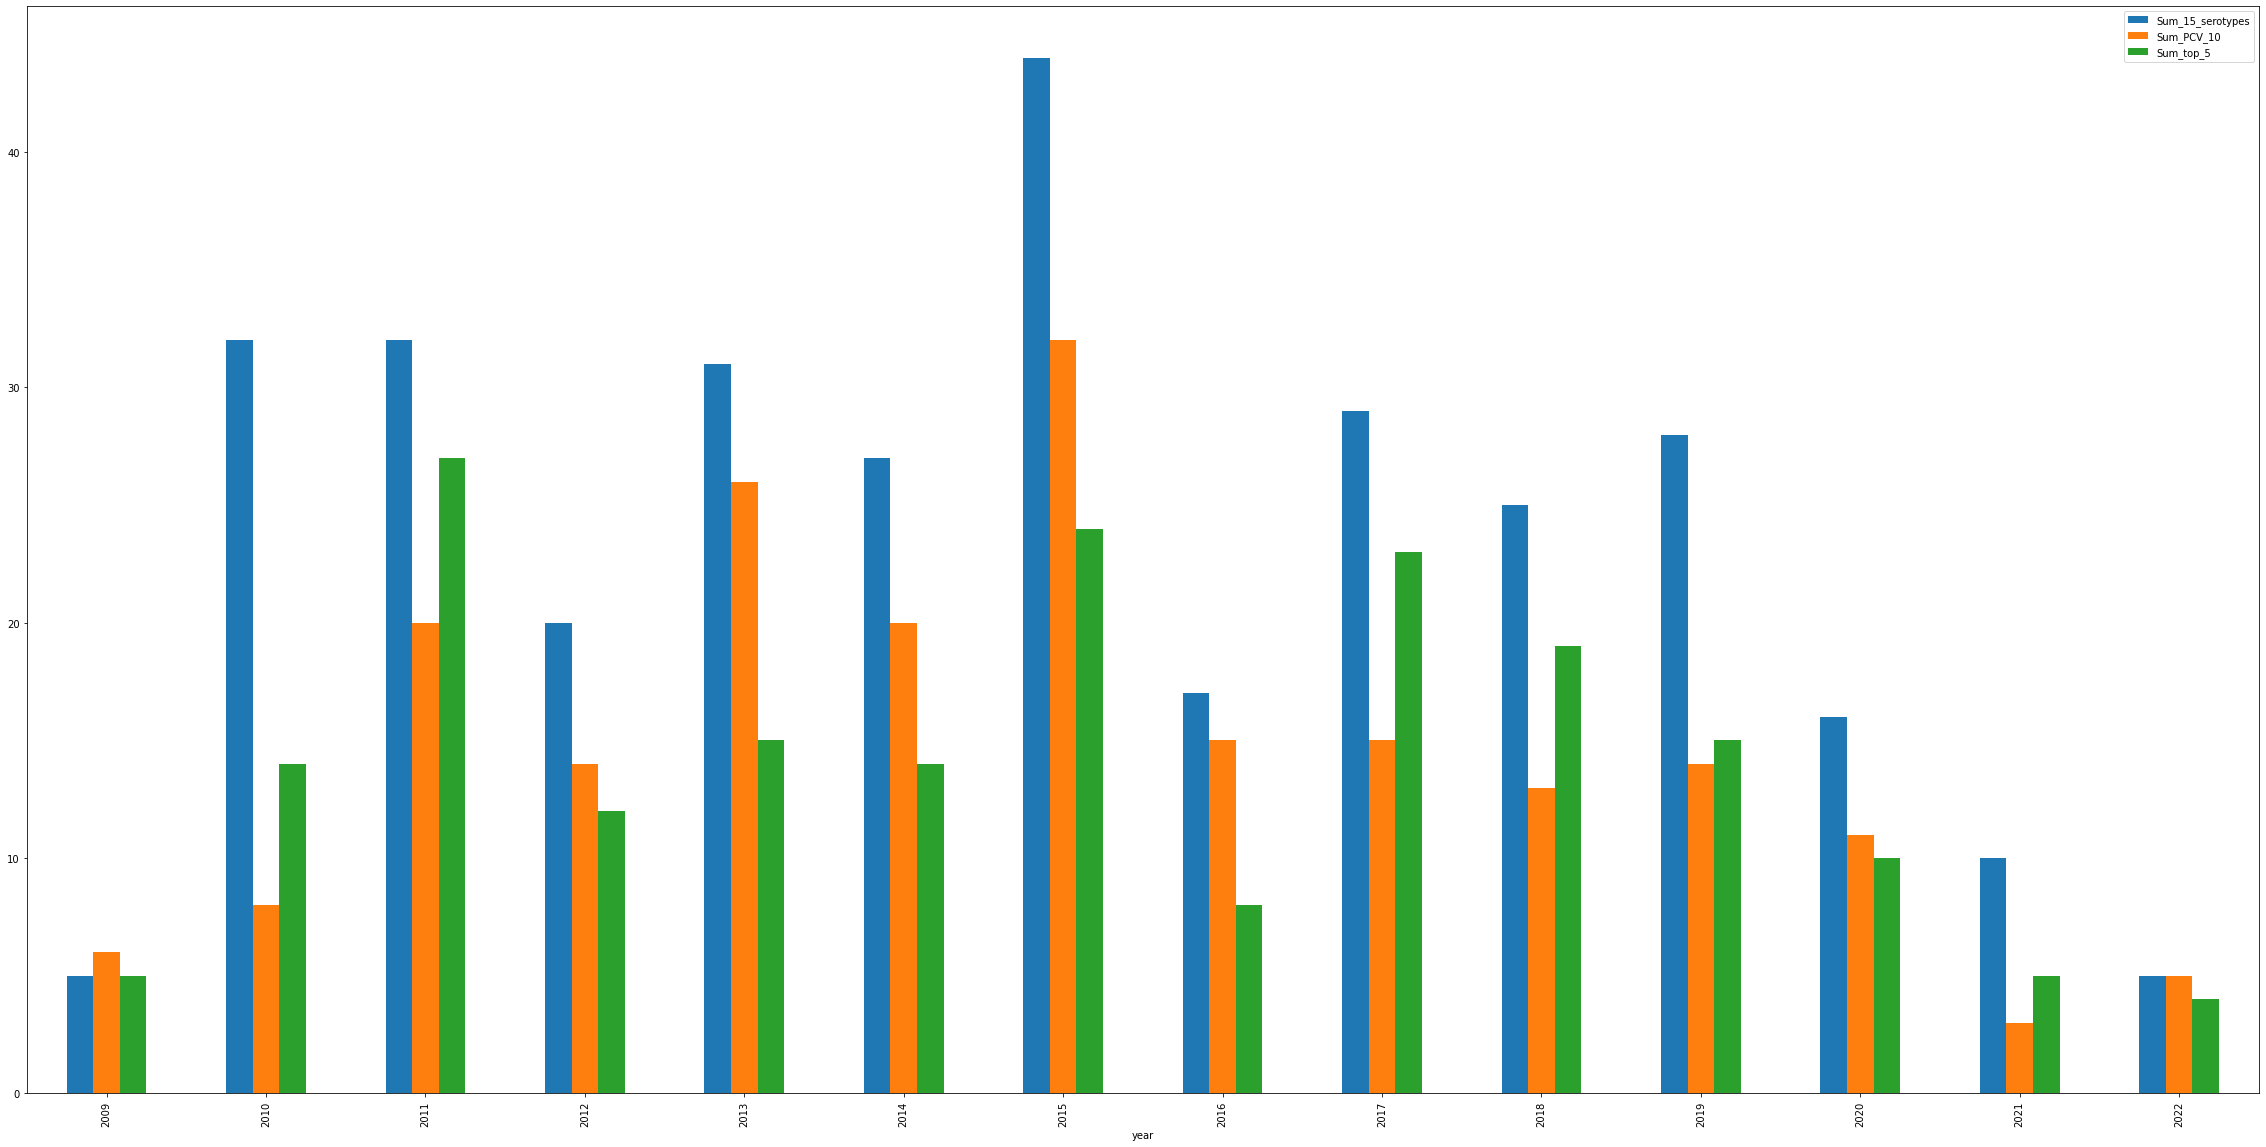

In [ ]:
df4.plot.bar(x='year')

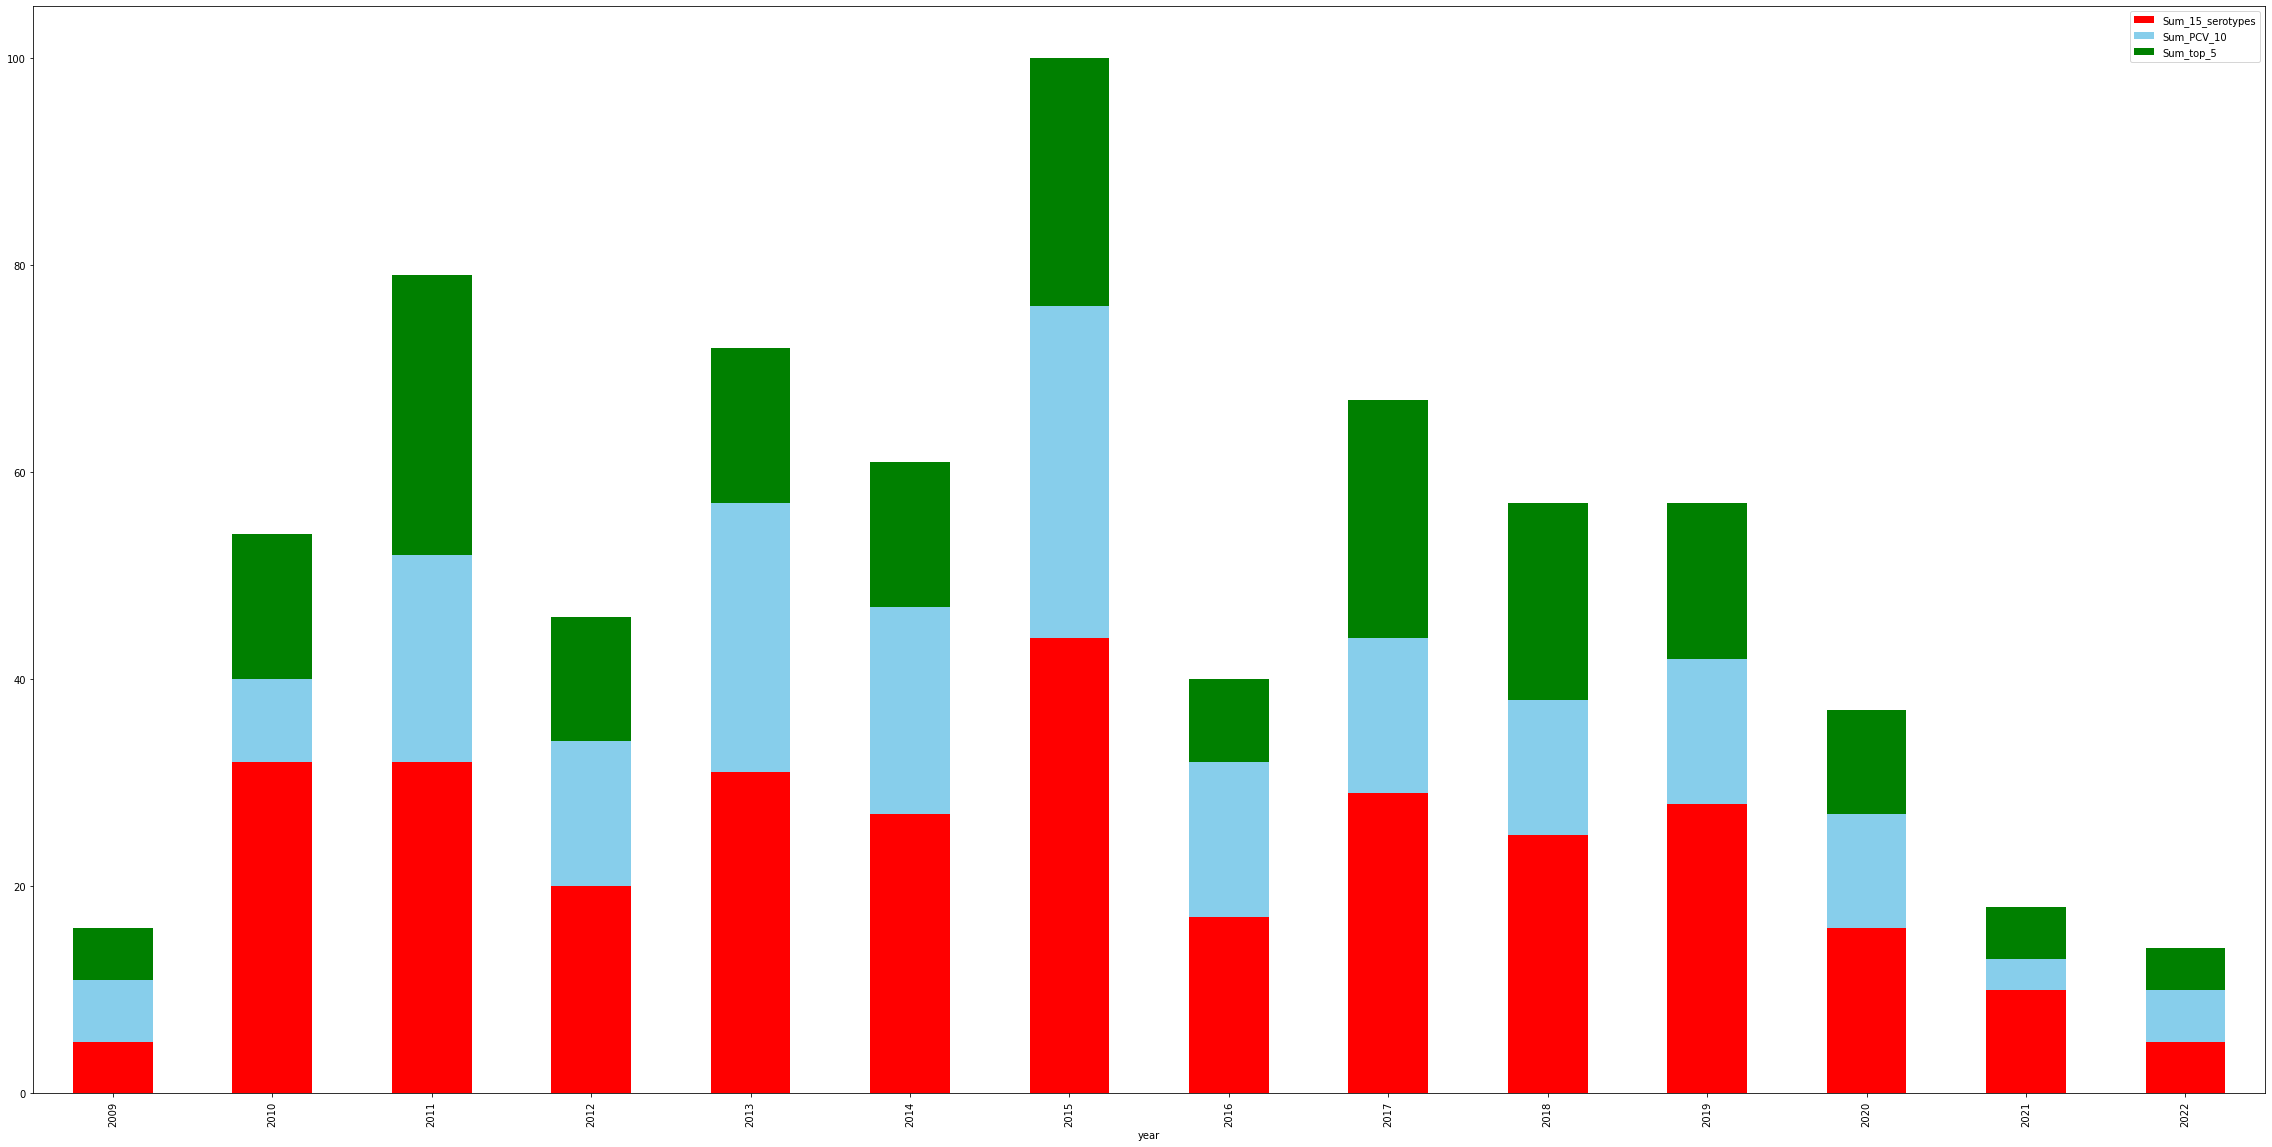

In [ ]:
df4.plot.bar(x='year',stacked=True, color=['red', 'skyblue', 'green'])

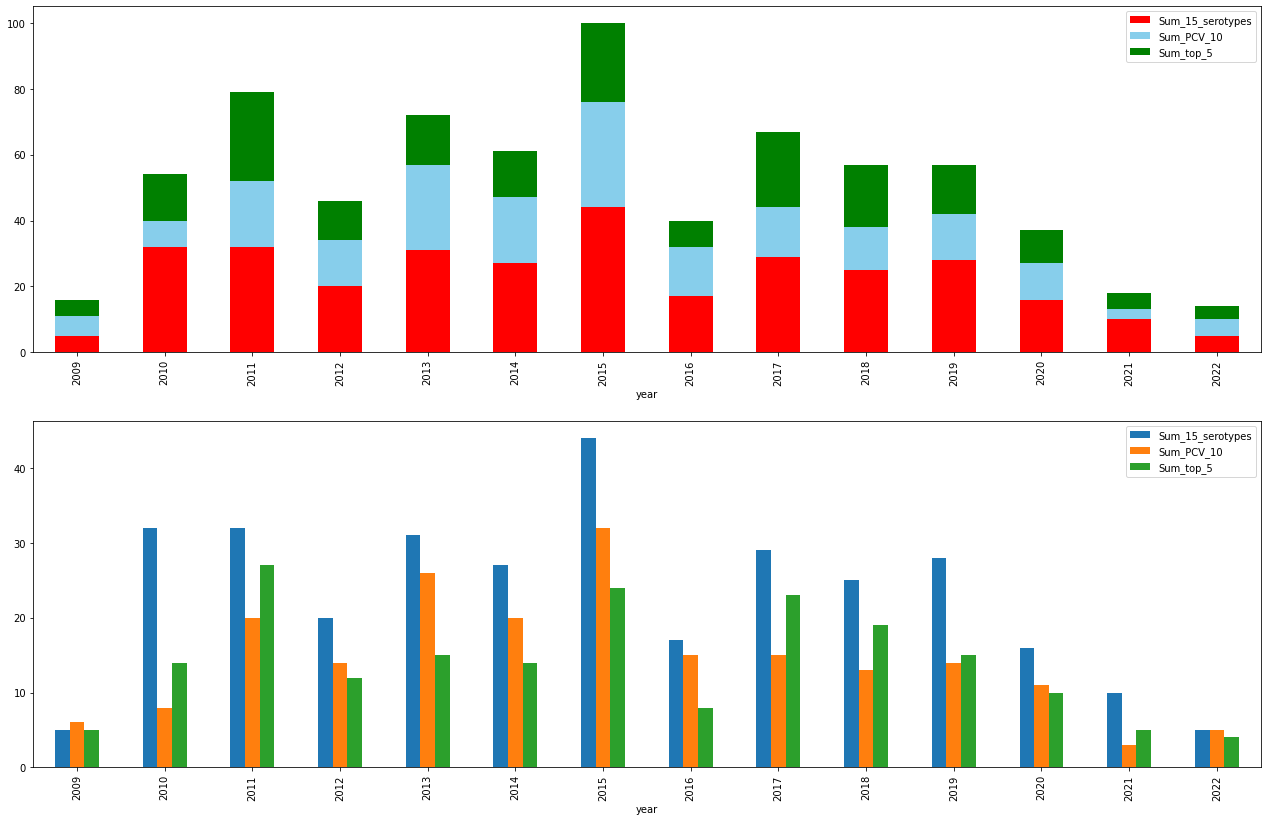

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(22, 14))
dn1= df4.plot.bar(x='year',stacked=True, color=['red', 'skyblue', 'green'],ax=axes[0])
#dn1 = df4.dendrogram(wardLink, ax=axes[0, 0])
dn2=df4.plot.bar(x='year', ax=axes[1])

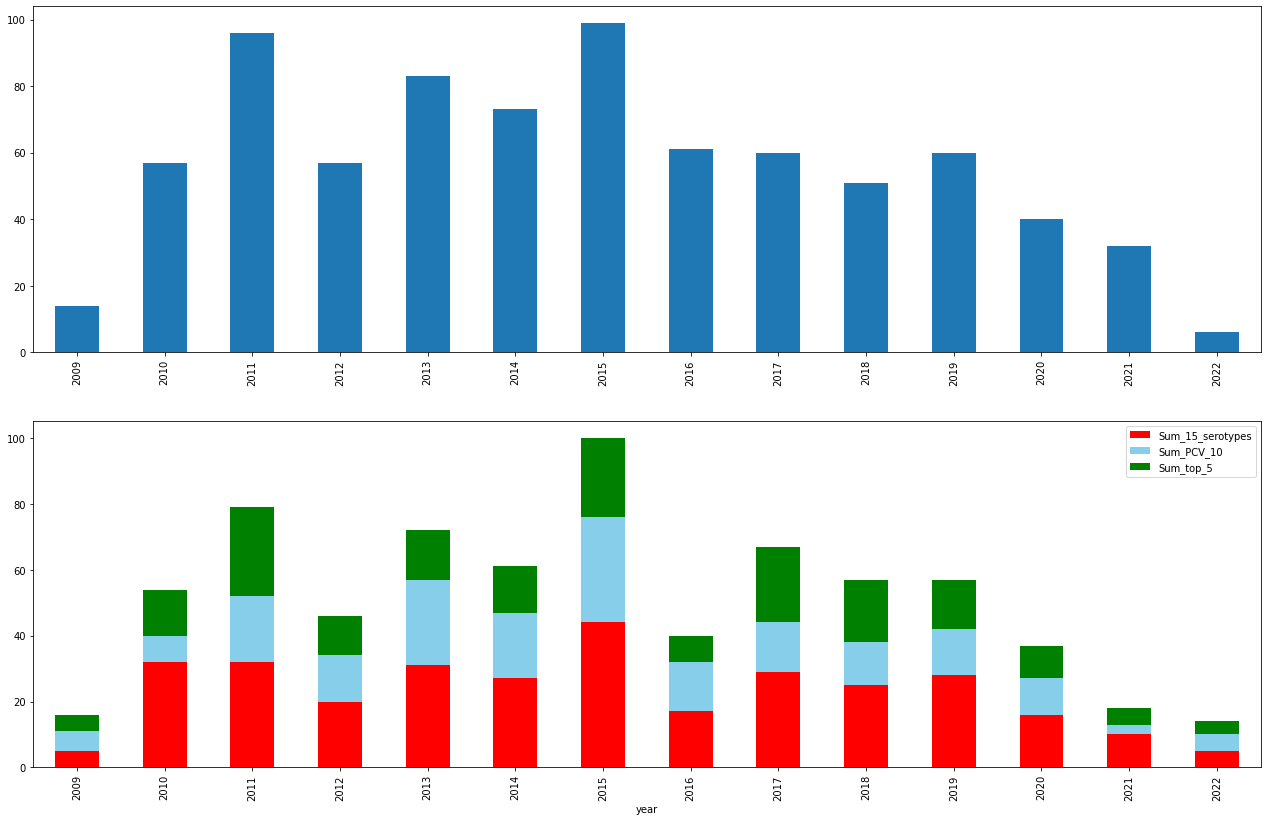

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(22, 14))
dn1= df_year['year'].value_counts().sort_index().plot(kind='bar',ax=axes[0])
dn2= df4.plot.bar(x='year',stacked=True, color=['red', 'skyblue', 'green'],ax=axes[1])

Top 5 and others

In [ ]:
data=files.upload()

Saving top_5.csv to top_5.csv


In [ ]:
df5=pd.read_csv(io.StringIO(data['top_5.csv'].decode('utf-8')))

In [ ]:
df5

,year,sero_1,sero_2,sero_8,sero_19F,sero_23F,total,others
0,2009,3,1,0,0,1,8,3
1,2010,4,4,4,1,1,40,26
2,2011,2,14,1,4,6,62,35
3,2012,5,3,2,1,1,37,25
4,2013,3,0,3,7,2,53,38
5,2014,3,1,4,3,3,61,47
6,2015,4,4,2,10,4,76,52
7,2016,2,2,1,2,1,49,41
8,2017,6,9,2,1,5,53,30
9,2018,7,3,6,1,2,43,24


In [ ]:
df5.drop(columns=['total'],inplace=True)

Text(0.5, 1.0, 'Top 5 serotypes with others (unstacked)')

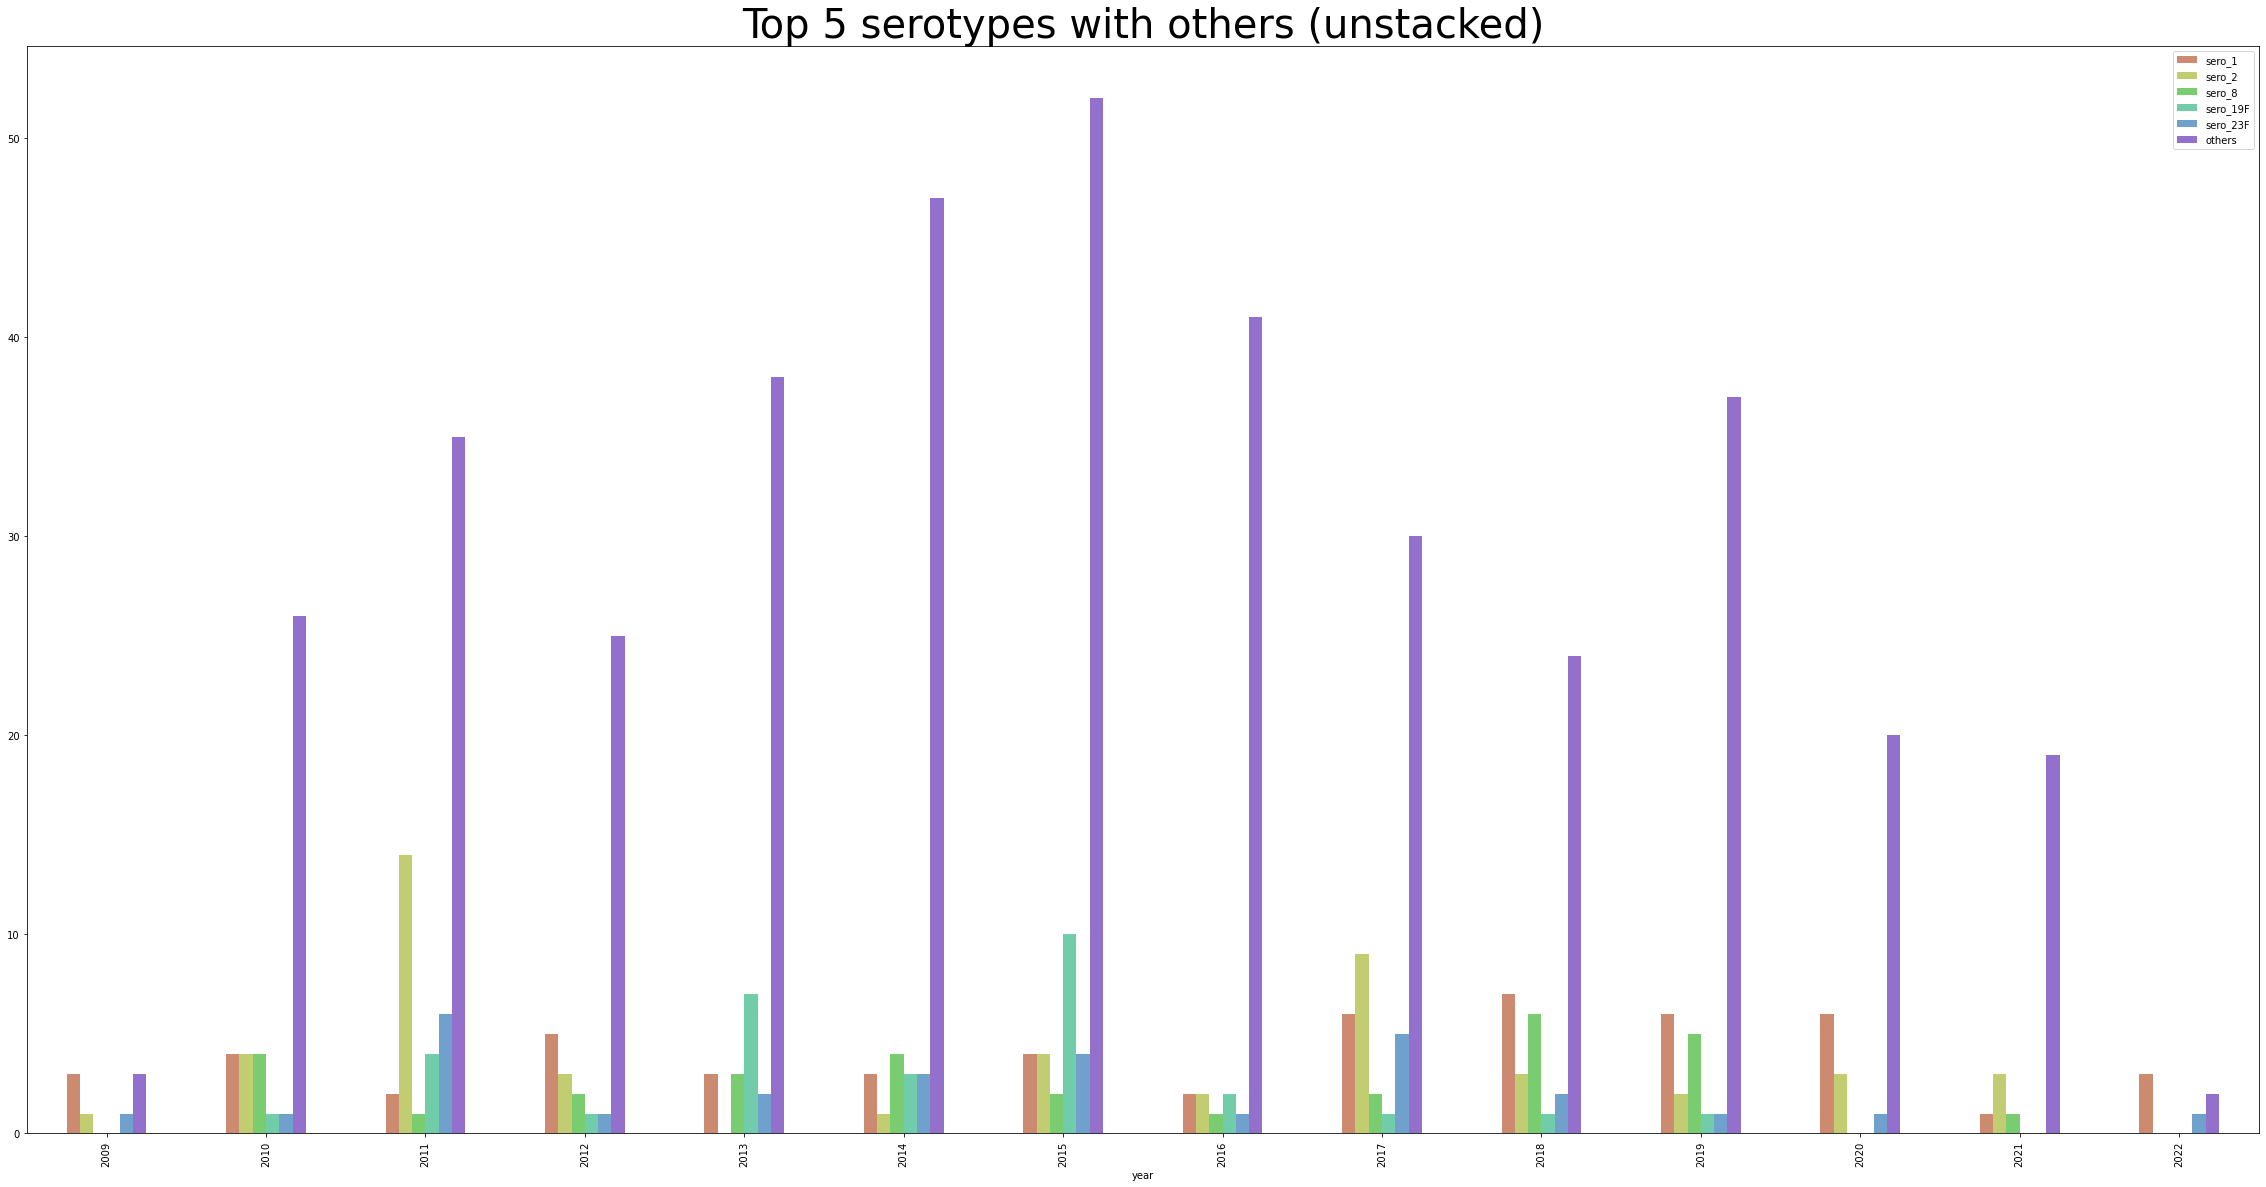

In [ ]:
df5.plot.bar(x='year', color=["#CC8B70", "#C2CC70", "#79CC70", "#70CCA9", "#70A1CC", "#9370CC"])
plt.title("Top 5 serotypes with others (unstacked)",fontsize=40,
          color="black")

Text(0.5, 1.0, 'Top 5 serotypes with others (stacked)')

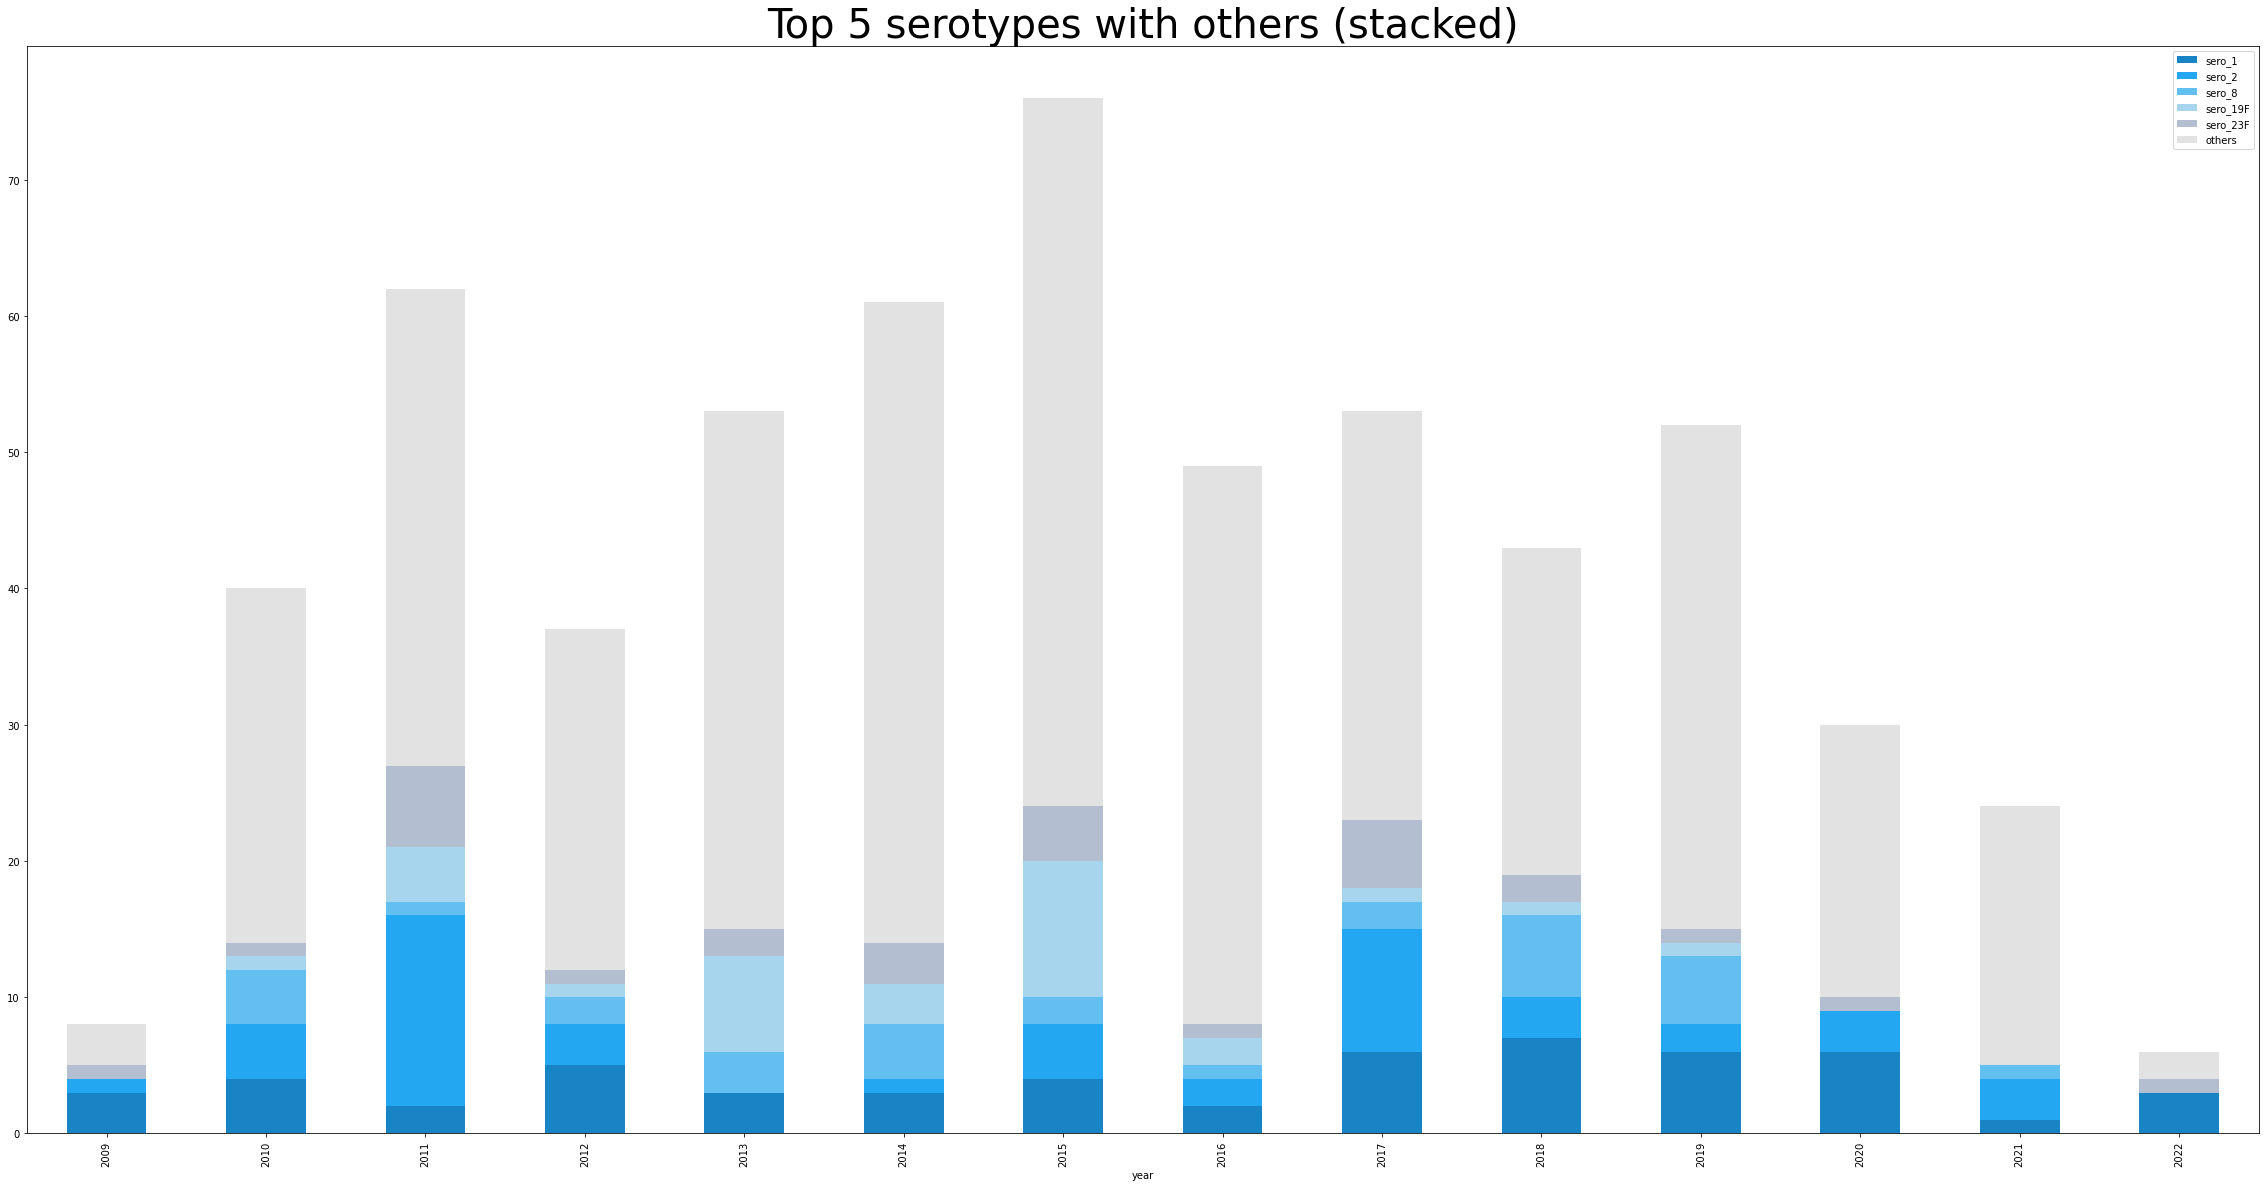

In [ ]:
df5.plot.bar(x='year',stacked=True, color=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", '#b3bfd1',"#e2e2e2"])
plt.title("Top 5 serotypes with others (stacked)",fontsize=40,
          color="black")

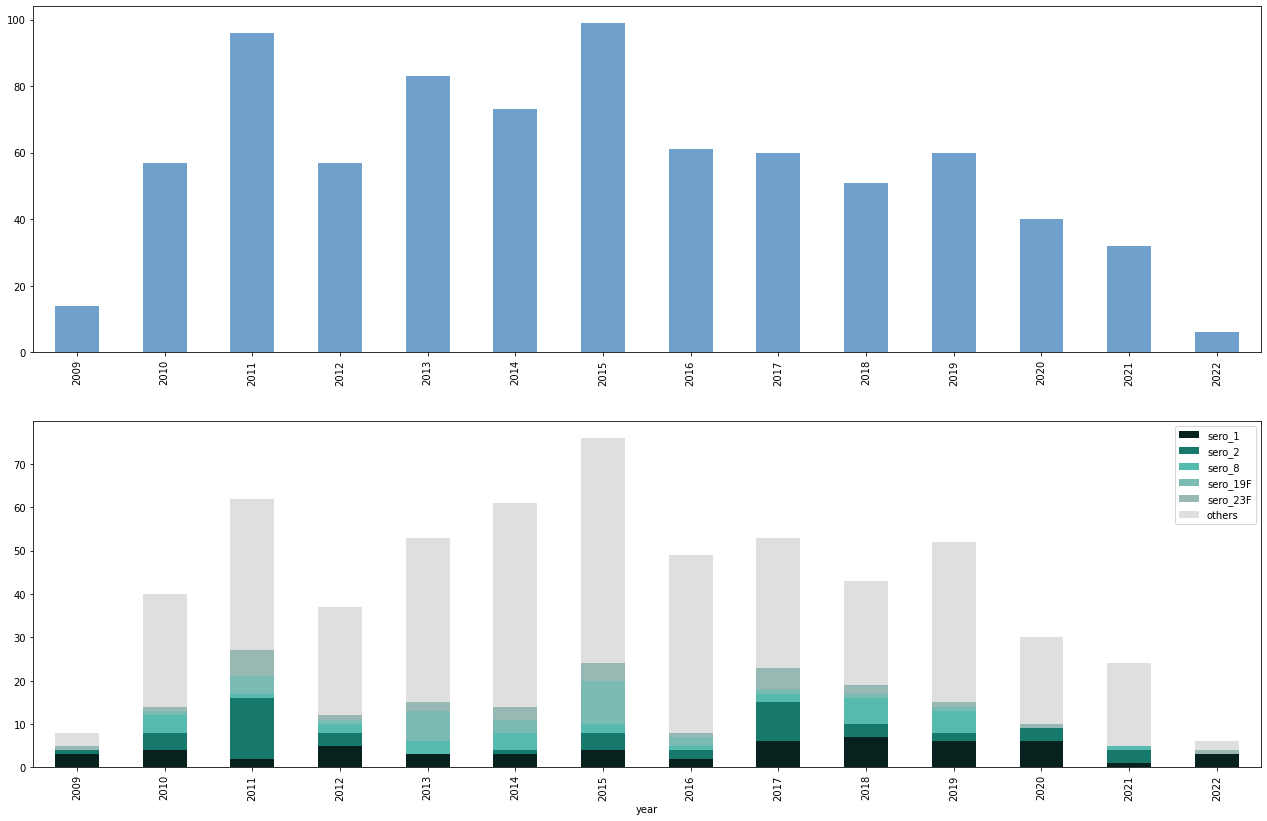

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(22, 14))
dn1= df_year['year'].value_counts().sort_index().plot(kind='bar',color='#70A1CC',ax=axes[0])
dn2= df5.plot.bar(x='year',stacked=True, color=["#06211E", "#17786C", "#55BBAF", "#7ABBB3", "#98B8B4", '#DFDFDF'],ax=axes[1])